In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heart=pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [4]:
heart.shape

(1025, 14)

In [5]:
print('Number of Rows is',heart.shape[0])
print('Number of columns is',heart.shape[1])

Number of Rows is 1025
Number of columns is 14


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

To check if our data is duplicated:

In [8]:
heart_dup=heart.duplicated().any()
print(heart_dup)

True


To drop duplicate:

In [9]:
heart=heart.drop_duplicates()

Recheck the shape

In [10]:
heart.shape

(302, 14)

In [11]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Draw Correlation Matrix

In [12]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

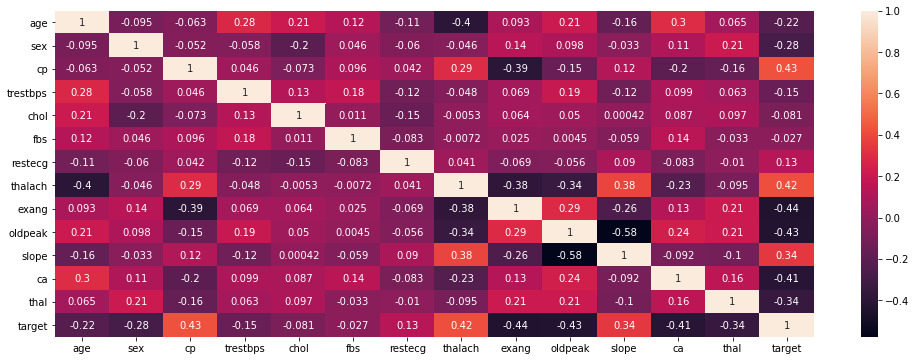

In [13]:
plt.figure(figsize=(17,6))
sns.heatmap(heart.corr(),annot=True)


How Many People Have heart disease in this Dataset?

In [14]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
heart['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [16]:
heart['target'].unique()

array([0, 1], dtype=int64)

C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


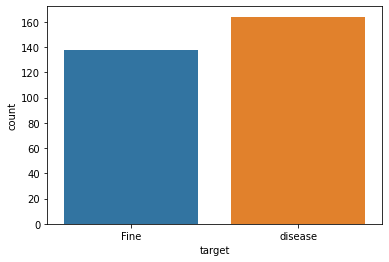

In [17]:
sns.countplot(heart['target'])
plt.xticks([0,1],['Fine','disease'])
plt.show()

Count the number of Males and Females in this Dataset

In [18]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
heart['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x21cdd1cfd30>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

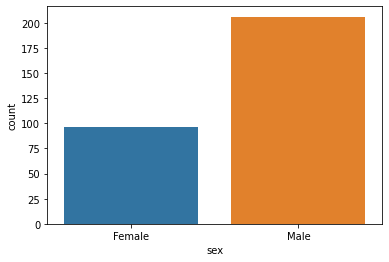

In [20]:
sns.countplot(heart['sex'])
plt.xticks([0,1],['Female','Male'])

Display Gender Distribution According To The Target Variable

In [21]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

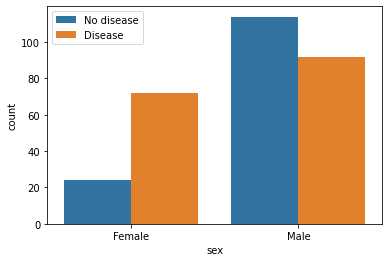

In [22]:
sns.countplot(x='sex',hue='target',data=heart)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No disease','Disease'])
plt.show()

Check Age Distribution In The Dataset

C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


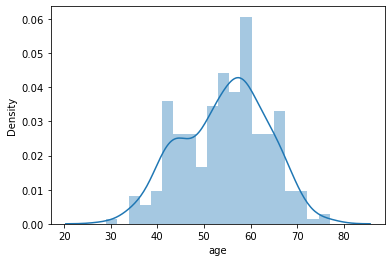

In [23]:
sns.distplot(heart['age'],bins=20)
plt.show()

Check Chest Pain Type
From the data sets,there are 4 values
   Value0;typical angina
   Value1;atypical angina
   Value2;non-anginal pain
   Value3;asymptomatic

C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


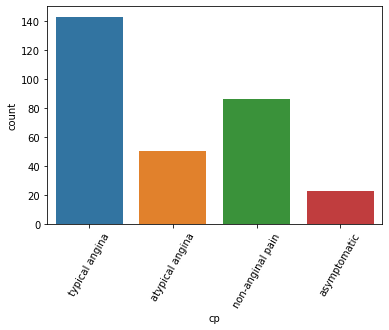

In [24]:
sns.countplot(heart['cp'])
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xticks(rotation=60)
plt.show()

Show Chest Pain Distribution As per Target Varble(CP in relation to Target)

In [25]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

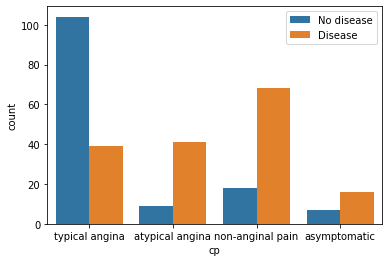

In [26]:
sns.countplot(x='cp',hue='target',data=heart)
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.legend(labels=['No disease','Disease'])
plt.show()

Show Fasting Blood Sugar Distribution According to Target Variable

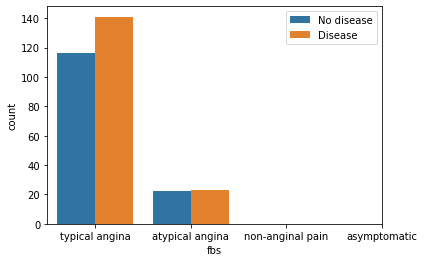

In [27]:
sns.countplot(x='fbs',hue='target',data=heart)
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.legend(labels=['No disease','Disease'])
plt.show()

Check Resting Blood Pressure Distribution

In [28]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:>

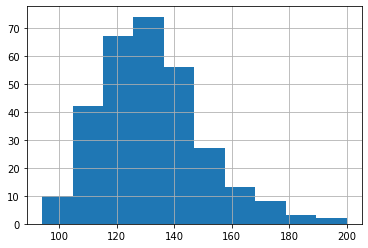

In [29]:
heart['trestbps'].hist()

Compare Resting Blood Pressure As per Sex Column:Facetgrid is use when you want to
visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset

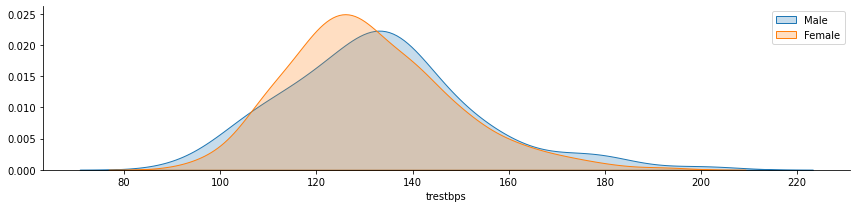

In [30]:
g=sns.FacetGrid(heart,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])

Show Distribution Of Serum Cholestrol

<AxesSubplot:>

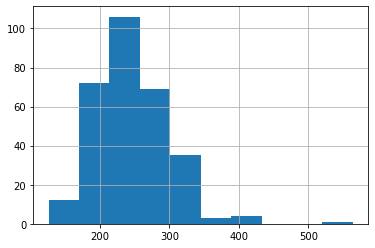

In [31]:
heart['chol'].hist()

Plot Continuous Variables:To d this,we have to seperate columns with continuous variables from categorical variables

In [32]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [33]:
cate_val=[]
cont_val=[]
for column in heart.columns:
    if heart[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [34]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [35]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

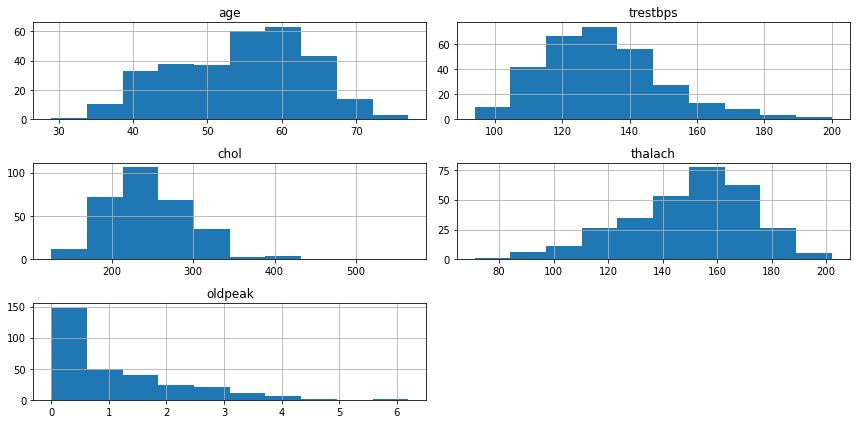

In [36]:
heart.hist(cont_val,figsize=(12,6))
plt.tight_layout()
plt.show()

DATA PROCESSING

Firstly,We will need to seperate categorical values from numerical columns.If number of unique values is less than 10,we can call them categorical columns otherwise,continuous(numerical)columns.

In [37]:
cate_val=[]
cont_val=[]
for column in heart.columns:
    if heart[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
    

In [38]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [39]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

To encode categorical columns,we need to convert columns with more than two unique values into binary vectors i.e 
1000
0100
0010
0001 So that we can use pd.get_dummies.

We will convert this array values into binary vectors. We can predict any column from other columns.So to avoid semi variable trap,we will need drop the first column of the binary vector.But firstly,we have to drop 'sex' and 'target' because they are already in two variables(0 and 1)


In [40]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [41]:
heart['restecg'].unique()

array([1, 0, 2], dtype=int64)

In [42]:
heart['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [43]:
cate_val.remove('sex')
cate_val.remove('target')

In [44]:
heart=pd.get_dummies(heart,columns=cate_val,drop_first=True)
heart.head(3)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


FEATURE SCALING:we use feature scaling because it allows us to put our features in the same scale.It is essential to scale in a machine learning algorithm.Machine learning algorithms that require feature scaling are Knearestneighbours,neural networks,support vector machines,linear and logistics regressions.The machine learning algorithms that do not require feature scaling are non linear machine learning algorithms.Any algorithm that is not distance based is not affected by feature scaling.From our new datasets above,we can see that(from 'cp' to 'thal') we do not need feature scaling because the categorical columns we encoded are already in the same range.But we will need it for the numerical datas in the dataset because they are abit distanced based.

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
st=StandardScaler()
heart[cont_val]=st.fit_transform(heart[cont_val])

In [47]:
heart.head(3)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


As we can see from above,we have been able to bring the numerical values to within the same range using StandardScaler.

SPLIT:we will have to split our data into dependent and independent variables (X matrix and y Vector)

In [48]:
X=heart.drop('target',axis=1)
y=heart['target']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

We use train_test_split to evaluate the performance of our machine learning algorithms.

1..LOGISTICS REGRESSION:Because our 'target' values are categorical,it is a classification probleme and we will need to use different classification algorithm methods and evaluate based on the highest accuracy 

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_pred1=log.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

i..SUPPORT VECTOR CLASSIFIER(svc):

In [57]:
from sklearn import svm

In [58]:
svm=svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [59]:
y_pred2=svm.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

ii..KNneighbors CLASSIFIER:


In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [63]:
y_pred3=knn.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [65]:
score=[]

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
    
    

In [66]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)
    

0.8032786885245902

2.. NON LINEAR ML ALGORITHM:preprocessing like encoding and feature scaling is not required

In [67]:
heart2=pd.read_csv('heart.csv')
heart2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [68]:
heart2=heart2.drop_duplicates()

In [69]:
heart2.shape

(302, 14)

In [70]:
X=heart2.drop('target',axis=1)
y=heart2['target']

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

i DECISION TREE CLASSIFIER

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
y_pred4=dt.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred4)

0.7377049180327869

ii RANDOM FOREST CLASSIFIER

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
y_pred5=rf.predict(X_test)

In [79]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

iii GRADIENT BOOSTING CLASSIFIER

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [82]:
y_pred6=gbc.predict(X_test)

In [83]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

Now,we have predicted all the values with different algorithms,we need to create a dataset to help in comparing all our algorithms

In [84]:
final_pred=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

In [85]:
final_pred

,Models,ACC
0,LR,0.786885
1,SVC,0.803279
2,KNN,0.737705
3,DT,0.737705
4,RF,0.852459
5,GB,0.803279


Let us visualize the dataset..

C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


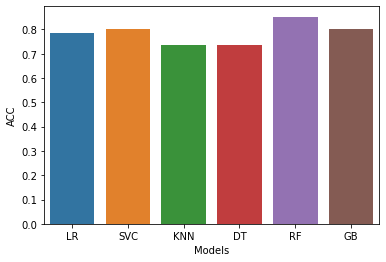

In [86]:
sns.barplot(final_pred['Models'],final_pred['ACC'])
plt.show()

From our plot,it is obvious that Random Forest Classifier is the most accurate model to use in predicting

In [87]:
X=heart2.drop('target',axis=1)
y=heart2['target']

In [88]:
New_data=X.head(1)

In [89]:
New_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [90]:
Anoda_data=X.head(3)

In [91]:
Anoda_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3


In [92]:
p=rf.predict(New_data)
if p[0]==0:
    print('No Disease')
else:
    print('Disease')

No Disease


Save Our Model Using Joblib

In [93]:
import joblib

In [94]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [95]:
model=joblib.load('model_joblib_heart')

In [96]:
model.predict(Anoda_data)

array([0, 0, 0], dtype=int64)

In [97]:
model.predict(New_data)

array([0], dtype=int64)

From our model.predict(),it shows new_data and Anoda_data have no disease paients in their rows

GUI:

In [98]:
from tkinter import*
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    if result==0:
        Label(master,text="No Heart Disease").grid(row=31)
    else:
        Label(master,text="Possibility of Heart Disease").grid(row=31)
master=Tk()
master.title("Heart Disease Prediction System")

label = Label(master,text="Heart Disease Prediction System"
                         ,bg = "black",fg="white").\
                             grid(row=0,columnspan=2)


Label(master,text="Enter Your Age").grid(row=1)
Label(master,text="Male Or Female [1/0]").grid(row=2)
Label(master,text="Enter Value of CP").grid(row=3)
Label(master,text="Enter value of trestbps").grid(row=4)
Label(master,text="Enter Value of chol").grid(row=5)
Label(master,text="Enter Value of fbs").grid(row=6)
Label(master,text="Enter Value of restecg").grid(row=7)
Label(master,text="Enter Value of thalach").grid(row=8)
Label(master,text="Enter Value of exang").grid(row=9)
Label(master,text="Enter Value of oldpeak").grid(row=10)
Label(master,text="Enter Value of slope").grid(row=11)
Label(master,text="Enter Value of ca").grid(row=12)
Label(master,text="Enter Value of thal").grid(row=13)


e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)
e11=Entry(master)
e12=Entry(master)
e13=Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)

Button(master,text="Predict",command=show_entry_fields).grid()


mainloop()


In [99]:
heart.head(4)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
